In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
measurements = Base.classes.measurement
station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date=dt.datetime(2016, 7, 31)
measurement_data = session.query(measurements.date,measurements.prcp).filter(measurements.date>date).all()

In [16]:
date_info = [row [0] for row in measurement_data]
precip_info = [row [1] for row in measurement_data]
type(date_info)

list

In [ ]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores






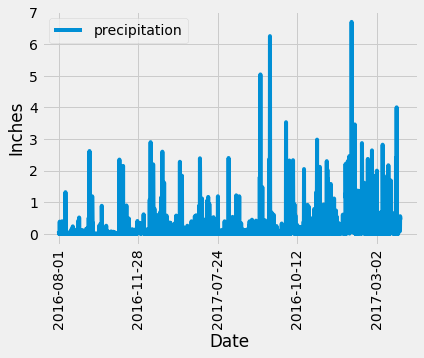

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(list(zip(date_info, precip_info)), columns = ['date', 'precipitation'])
df.dropna(inplace=True)
df.set_index('date', inplace = True)
# Sort the dataframe by date
df.sort_values('date')
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.ylabel('Inches')
plt.title ('')
plt.xlabel('Date')
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2148.000000
mean,0.182896
std,0.467339
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
session1 = Session(engine)
Total_stations_count = session1.query(measurements.station, measurements.date, measurements.tobs).\
    group_by (measurements.station).\
    order_by (measurements.date).\
    count()

Total_stations_count

9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session_2 = Session(engine)
stat =[measurements.station,
      func.min(measurements.tobs),
      func.max(measurements.tobs),
      func.count(measurements.tobs),
      func.avg(measurements.tobs)]
activity = session_2.query(*stat).\
    group_by(measurements.station).\
    order_by(func.count(measurements.tobs).desc()).all()
activity

[('USC00519281', 54.0, 85.0, 2772, 71.66378066378067),
 ('USC00519397', 56.0, 87.0, 2724, 74.55323054331865),
 ('USC00513117', 59.0, 85.0, 2709, 72.68918420081211),
 ('USC00519523', 56.0, 85.0, 2669, 74.5436493068565),
 ('USC00516128', 58.0, 84.0, 2612, 70.91500765696784),
 ('USC00514830', 58.0, 85.0, 2202, 74.8732970027248),
 ('USC00511918', 53.0, 87.0, 1979, 71.61596766043456),
 ('USC00517948', 58.0, 87.0, 1372, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 511, 72.72407045009784)]

In [21]:
most_active = [row[0] for row in activity]
most_activity = most_active[0]
most_activity

'USC00519281'

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session_4 = Session(engine)
stat =[measurements.station,
      func.min(measurements.tobs),
      func.max(measurements.tobs),
      func.count(measurements.tobs),
      func.avg(measurements.tobs)]
activity = session_4.query(*stat).\
    group_by(measurements.station).\
    order_by(func.count(measurements.tobs).desc()).all()
activity[0]

('USC00519281', 54.0, 85.0, 2772, 71.66378066378067)

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session3 = Session(engine)
date_1 = dt.datetime(2016, 7, 31)
temp_info = session3.query(measurements.station, measurements.date, measurements.tobs).\
    filter(measurements.station == 'USC00519281').\
    filter(measurements.date > date_1).all()
date = [row[1] for row in temp_info]
temp = [row[2] for row in temp_info]
temp_df = pd.DataFrame(list(zip(date, temp)), columns = ['Date', 'Temp'])
temp_df.set_index('Date', inplace = True)
temp_df.sort_values('Date')

,Temp
Date,
2016-08-01,76.0
2016-08-02,76.0
2016-08-03,77.0
2016-08-04,77.0
2016-08-05,81.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


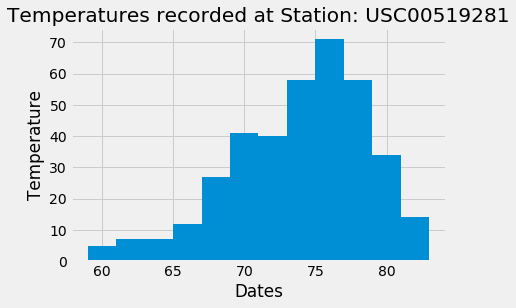

In [24]:
temp_df.hist(bins=12)
plt.title('Temperatures recorded at Station: USC00519281')
plt.xlabel('Dates')
plt.ylabel('Temperature')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
        filter(measurements.date >= start_date).filter(measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
import sqlalchemy

In [ ]:
pip install sqlalchemy